In [17]:
import actionet
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
adata = anndata.read_h5ad("../data/test_adata_post.h5ad")

In [10]:
actionet.preprocessing.filter_anndata(adata, min_cells_per_feat=0.01, inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4, inplace=True)
sc.pp.log1p(adata, base=2, copy=True)

AnnData object with n_obs × n_vars = 6790 × 14409
    obs: 'Barcode', 'CellLabel', 'assigned_archetype'
    var: 'ENSEMBL', 'Gene', 'Chromosome', 'Biotype'
    uns: 'action_params', 'log1p'
    obsm: 'C_merged', 'C_stacked', 'H_merged', 'H_stacked', 'action', 'action_B', 'archetype_footprint', 'umap'
    varm: 'action_A', 'action_V'
    layers: 'logcounts'
    obsp: 'actionet'

In [11]:
actionet.reduce_kernel(adata, n_components=30, key_added='action', inplace=True)

Computing reduced ACTION kernel:
Performing SVD using IRLB (sparse) -- A: 14409 x 6790
Kernel computed successfully.


In [12]:
actionet.run_actionet(adata, k_max=30, inplace=True)

done


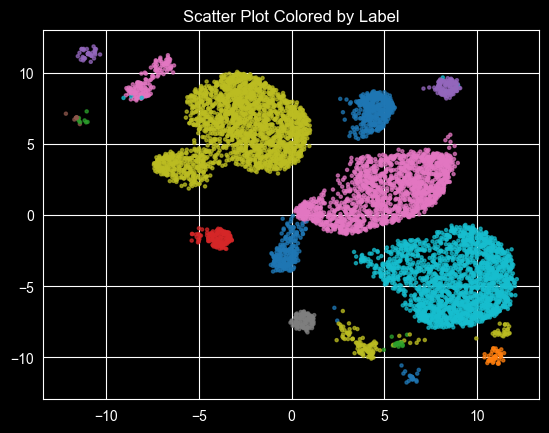

In [13]:
labels = adata.obs['CellLabel'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['umap'][:, 0],
    y=adata.obsm['umap'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    alpha=0.7,
    s = 5
)
plt.title('Scatter Plot Colored by Label')
plt.show()

In [14]:
markers = actionet.find_markers(adata, adata.obs['CellLabel'], features_use="Gene", top_genes=30, return_type='dataframe')

Computing feature specificity ... done


In [15]:
annots_out = actionet.annotate_cells(adata, markers.to_dict(), layer = 'logcounts', method='vision', features_use='Gene', net_key='actionet', use_enrichment=True, use_lpa=False, n_threads=0)

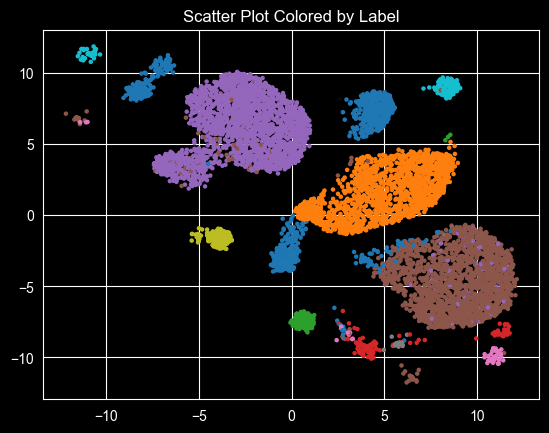

In [18]:
labels = pd.Series(annots_out['labels']).astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['umap'][:, 0],
    y=adata.obsm['umap'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    alpha=np.clip(annots_out['confidence'], 0, 1.0),
    s = 5
)
# plt.xlabel('X')
# plt.ylabel('Y')
plt.title('Scatter Plot Colored by Label')
# plt.colorbar(label='CellLabel')
plt.show()